# వర్గీకరణ మోడల్ నిర్మించండి: రుచికరమైన ఆసియన్లు మరియు భారతీయ వంటకాలు


## Cuisine classifiers 1

ఈ పాఠంలో, మనం వివిధ తరగతీకరణాలను పరిశీలించబోతున్నాము *ఒక సమూహం పదార్థాల ఆధారంగా ఒక నిర్దిష్ట జాతీయ వంటకాన్ని అంచనా వేయడానికి.* ఇది చేస్తూ, మనం తరగతీకరణ పనుల కోసం అల్గోరిథమ్స్ ఎలా ఉపయోగించవచ్చో మరింత తెలుసుకుంటాము.

### [**పాఠం ముందు క్విజ్**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **తయారీ**

ఈ పాఠం మన [మునుపటి పాఠం](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) పై ఆధారపడి ఉంది, అందులో:

-   ఆసియా మరియు భారతదేశంలోని అద్భుతమైన వంటకాల గురించి డేటాసెట్ ఉపయోగించి తరగతీకరణలకు సున్నితమైన పరిచయాన్ని ఇచ్చాము 😋.

-   మన డేటాను సిద్ధం చేయడానికి మరియు శుభ్రపరచడానికి కొన్ని [dplyr క్రియాపదాలు](https://dplyr.tidyverse.org/) ను పరిశీలించాము.

-   ggplot2 ఉపయోగించి అందమైన విజువలైజేషన్లు తయారు చేసాము.

-   అసమతులిత డేటాను ఎలా నిర్వహించాలో [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) ఉపయోగించి ప్రీప్రాసెసింగ్ ద్వారా చూపించాము.

-   మన రిసిపీ పనిచేస్తుందో లేదో నిర్ధారించడానికి `prep` మరియు `bake` ఎలా చేయాలో చూపించాము.

#### **ముందస్తు అవసరాలు**

ఈ పాఠం కోసం, మన డేటాను శుభ్రపరచడానికి, సిద్ధం చేయడానికి మరియు విజువలైజ్ చేయడానికి క్రింది ప్యాకేజీలు అవసరం:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) అనేది డేటా సైన్స్‌ను వేగవంతం, సులభం మరియు మరింత సరదాగా మార్చడానికి రూపొందించిన [R ప్యాకేజీల సేకరణ](https://www.tidyverse.org/packages).

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) ఫ్రేమ్‌వర్క్ అనేది మోడలింగ్ మరియు మెషీన్ లెర్నింగ్ కోసం [ప్యాకేజీల సేకరణ](https://www.tidymodels.org/packages/).

-   `themis`: [themis ప్యాకేజీ](https://themis.tidymodels.org/) అసమతులిత డేటాను నిర్వహించడానికి అదనపు రిసిపీ స్టెప్స్ అందిస్తుంది.

-   `nnet`: [nnet ప్యాకేజీ](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ఒకే హిడెన్ లేయర్ ఉన్న ఫీడ్-ఫార్వర్డ్ న్యూరల్ నెట్‌వర్క్‌లను అంచనా వేయడానికి మరియు మల్టినోమియల్ లాజిస్టిక్ రిగ్రెషన్ మోడల్స్ కోసం ఫంక్షన్లు అందిస్తుంది.

మీరు వాటిని ఇన్‌స్టాల్ చేసుకోవచ్చు:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

వికల్పంగా, క్రింది స్క్రిప్ట్ మీరు ఈ మాడ్యూల్‌ను పూర్తి చేయడానికి అవసరమైన ప్యాకేజీలు ఉన్నాయా లేదా అని తనిఖీ చేస్తుంది మరియు అవి లేనప్పుడు వాటిని మీ కోసం ఇన్‌స్టాల్ చేస్తుంది.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



ఇప్పుడు, మనం వెంటనే ప్రారంభిద్దాం!

## 1. డేటాను శిక్షణ మరియు పరీక్ష సెట్లుగా విభజించండి.

మనం మా గత పాఠం నుండి కొన్ని దశలను ఎంచుకోవడం ప్రారంభిస్తాము.

### `dplyr::select()` ఉపయోగించి వేరే వంటకాల మధ్య గందరగోళాన్ని సృష్టించే అత్యంత సాధారణ పదార్థాలను తొలగించండి.

ప్రతి ఒక్కరూ బియ్యం, వెల్లుల్లి మరియు అల్లం ఇష్టపడతారు!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


సరే! ఇప్పుడు, డేటాను 70% శిక్షణకు మరియు 30% పరీక్షకు విభజించడానికి సమయం వచ్చింది. శిక్షణ మరియు ధృవీకరణ డేటాసెట్‌లలో ప్రతి వంటకపు నిష్పత్తిని నిలుపుకోవడానికి `stratification` సాంకేతికతను కూడా ఉపయోగిస్తాము.

[rsample](https://rsample.tidymodels.org/), Tidymodels‌లోని ఒక ప్యాకేజ్, సమర్థవంతమైన డేటా విభజన మరియు రీసాంప్లింగ్ కోసం మౌలిక సదుపాయాలను అందిస్తుంది:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## 2. అసమతుల్య డేటాతో వ్యవహరించడం

మూల డేటా సెట్‌లో మరియు మా శిక్షణ సెట్‌లో మీరు గమనించగలిగినట్లుగా, వంటకాల సంఖ్యలో చాలా అసమానమైన పంపిణీ ఉంది. కొరియన్ వంటకాలు థాయ్ వంటకాల కంటే *దాదాపు* 3 రెట్లు ఎక్కువగా ఉన్నాయి. అసమతుల్య డేటా తరచుగా మోడల్ పనితీరుపై ప్రతికూల ప్రభావాలు చూపుతుంది. చాలా మోడల్స్ గమనికల సంఖ్య సమానంగా ఉన్నప్పుడు ఉత్తమంగా పనిచేస్తాయి, అందువల్ల అసమతుల్య డేటాతో సమస్యలు ఎదుర్కొంటాయి.

అసమతుల్య డేటా సెట్‌లతో వ్యవహరించడానికి ప్రధానంగా రెండు మార్గాలు ఉన్నాయి:

-   మైనారిటీ తరగతికి గమనికలను జోడించడం: `ఓవర్-సాంప్లింగ్` ఉదాహరణకు SMOTE అల్గోరిథం ఉపయోగించడం, ఇది ఈ కేసుల సమీప పొరుగువారిని ఉపయోగించి మైనారిటీ తరగతికి కొత్త ఉదాహరణలను సృజనాత్మకంగా ఉత్పత్తి చేస్తుంది.

-   మెజారిటీ తరగతిలోని గమనికలను తొలగించడం: `అండర్-సాంప్లింగ్`

మా గత పాఠంలో, మేము `recipe` ఉపయోగించి అసమతుల్య డేటా సెట్‌లతో ఎలా వ్యవహరించాలో చూపించాము. ఒక రిసిపీ అనేది డేటా విశ్లేషణకు సిద్ధం చేయడానికి డేటా సెట్‌పై ఏ దశలను వర్తింపజేయాలో వివరించే బ్లూప్రింట్‌గా భావించవచ్చు. మా సందర్భంలో, మా `training set` కోసం వంటకాల సంఖ్యలో సమాన పంపిణీ ఉండాలని మేము కోరుకుంటున్నాము. దీని కోసం నేరుగా ప్రారంభిద్దాం.


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

మీరు ఖచ్చితంగా ముందుకు వెళ్లి నిర్ధారించవచ్చు (prep+bake ఉపయోగించి) రెసిపీ మీరు ఆశించినట్లుగా పనిచేస్తుందని - అన్ని వంటక లేబుళ్లకు `559` పరిశీలనలు ఉన్నాయి.

మనం ఈ రెసిపీని మోడలింగ్ కోసం ప్రీప్రాసెసర్‌గా ఉపయోగించబోతున్నందున, ఒక `workflow()` మన కోసం అన్ని prep మరియు bake చేస్తుంది, కాబట్టి మనం రెసిపీని మానవీయంగా అంచనా వేయాల్సిన అవసరం లేదు.

ఇప్పుడు మేము ఒక మోడల్ శిక్షణ ఇవ్వడానికి సిద్ధంగా ఉన్నాము 👩‍💻👨‍💻!

## 3. మీ క్లాసిఫైయర్‌ను ఎంచుకోవడం

<p >
   <img src="../../../../../../translated_images/te/parsnip.cd2ce92622976502.jpg"
   width="600"/>
   <figcaption>@allison_horst చేత కళాకృతి</figcaption>


ఇప్పుడు మనం ఈ పని కోసం ఏ అల్గోరిథమ్ ఉపయోగించాలో నిర్ణయించుకోవాలి 🤔.

Tidymodels లో, [`parsnip package`](https://parsnip.tidymodels.org/index.html) వివిధ ఇంజిన్ల (ప్యాకేజీల) మధ్య మోడల్స్‌తో పని చేయడానికి సुसंगత ఇంటర్‌ఫేస్‌ను అందిస్తుంది. దయచేసి parsnip డాక్యుమెంటేషన్‌ను చూడండి [మోడల్ రకాలు & ఇంజిన్లు](https://www.tidymodels.org/find/parsnip/#models) మరియు వాటి అనుగుణమైన [మోడల్ ఆర్గ్యుమెంట్లు](https://www.tidymodels.org/find/parsnip/#model-args) గురించి తెలుసుకోండి. మొదటి చూపులో ఈ వైవిధ్యం కొంచెం గందరగోళంగా ఉంటుంది. ఉదాహరణకు, క్రింది పద్ధతులు అన్ని వర్గీకరణ సాంకేతికతలను కలిగి ఉంటాయి:

-   C5.0 రూల్-బేస్డ్ వర్గీకరణ మోడల్స్

-   ఫ్లెక్సిబుల్ డిస్క్రిమినెంట్ మోడల్స్

-   లీనియర్ డిస్క్రిమినెంట్ మోడల్స్

-   రెగ్యులరైజ్డ్ డిస్క్రిమినెంట్ మోడల్స్

-   లాజిస్టిక్ రిగ్రెషన్ మోడల్స్

-   మల్టినోమియల్ రిగ్రెషన్ మోడల్స్

-   నైవ్ బేస్ మోడల్స్

-   సపోర్ట్ వెక్టర్ మెషీన్స్

-   నేరెస్ట్ నైబర్స్

-   డెసిషన్ ట్రీస్

-   ఎన్‌సెంబుల్ పద్ధతులు

-   న్యూరల్ నెట్‌వర్క్స్

జాబితా ఇంకా కొనసాగుతుంది!

### **ఏ క్లాసిఫయర్ ఎంచుకోవాలి?**

అయితే, మీరు ఏ క్లాసిఫయర్ ఎంచుకోవాలి? తరచుగా, అనేక మోడల్స్‌ను అమలు చేసి మంచి ఫలితాన్ని చూసే విధానం పరీక్షించడానికి ఒక మార్గం.

> AutoML ఈ సమస్యను క్లౌడ్‌లో ఈ పోలికలను అమలు చేయడం ద్వారా సులభంగా పరిష్కరిస్తుంది, మీ డేటాకు ఉత్తమ అల్గోరిథమ్ ఎంచుకోవడానికి అనుమతిస్తుంది. దీన్ని ఇక్కడ ప్రయత్నించండి [ఇక్కడ](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

అలాగే, క్లాసిఫయర్ ఎంపిక మన సమస్యపై ఆధారపడి ఉంటుంది. ఉదాహరణకు, ఫలితం `రెండు తరగతుల కంటే ఎక్కువ`గా వర్గీకరించవచ్చు, మన కేసులో ఉన్నట్లయితే, మీరు `బైనరీ వర్గీకరణ`కి బదులుగా `మల్టిక్లాస్ వర్గీకరణ అల్గోరిథమ్` ఉపయోగించాలి.

### **మరింత మెరుగైన దృష్టికోణం**

అనుమానంగా ఊహించడంకంటే మెరుగైన మార్గం, ఈ డౌన్లోడ్ చేసుకునే [ML చీట్ షీట్](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott)లోని ఆలోచనలను అనుసరించడం. ఇక్కడ, మన మల్టిక్లాస్ సమస్య కోసం మనకు కొన్ని ఎంపికలు ఉన్నాయి:

<p >
   <img src="../../../../../../translated_images/te/cheatsheet.07a475ea444d2223.png"
   width="500"/>
   <figcaption>మైక్రోసాఫ్ట్ యొక్క అల్గోరిథమ్ చీట్ షీట్‌లోని ఒక భాగం, మల్టిక్లాస్ వర్గీకరణ ఎంపికలను వివరించడం</figcaption>


### **తర్కం**

మనం ఉన్న పరిమితుల ఆధారంగా వివిధ విధానాల ద్వారా ఎలా తర్కం చేయగలమో చూద్దాం:

-   **డీప్ న్యూరల్ నెట్‌వర్క్లు చాలా భారమైనవి**. మనం కలిగి ఉన్న శుభ్రమైన, కానీ కనిష్ట డేటాసెట్ మరియు మనం నోట్బుక్స్ ద్వారా స్థానికంగా శిక్షణ నడుపుతున్నందున, డీప్ న్యూరల్ నెట్‌వర్క్లు ఈ పనికి చాలా భారమైనవి.

-   **రెండు-వర్గాల వర్గీకర్త లేదు**. మనం రెండు-వర్గాల వర్గీకర్తను ఉపయోగించము, కాబట్టి ఒకటి-వర్సెస్-అల్ పద్ధతిని తప్పిస్తాము.

-   **డిసిషన్ ట్రీ లేదా లాజిస్టిక్ రిగ్రెషన్ పనిచేయవచ్చు**. డిసిషన్ ట్రీ పనిచేయవచ్చు, లేదా బహుళ వర్గాల డేటాకు బహుళనామ రిగ్రెషన్/బహుళ వర్గాల లాజిస్టిక్ రిగ్రెషన్ ఉపయోగించవచ్చు.

-   **బహుళ వర్గాల బూస్టెడ్ డిసిషన్ ట్రీలు వేరే సమస్యను పరిష్కరిస్తాయి**. బహుళ వర్గాల బూస్టెడ్ డిసిషన్ ట్రీ అనేది నాన్‌పారామెట్రిక్ పనులకు అనుకూలంగా ఉంటుంది, ఉదా: ర్యాంకింగ్స్ నిర్మించడానికి రూపొందించిన పనులు, కాబట్టి ఇది మనకు ఉపయోగకరం కాదు.

అలాగే, సాధారణంగా మరింత సంక్లిష్టమైన మెషీన్ లెర్నింగ్ మోడల్స్ (ఉదా: ఎంసెంబుల్ పద్ధతులు) ప్రారంభించే ముందు, ఏం జరుగుతుందో అర్థం చేసుకోవడానికి సాధారణమైన మోడల్‌ను నిర్మించడం మంచిది. కాబట్టి ఈ పాఠం కోసం, మనం `బహుళనామ రిగ్రెషన్` మోడల్‌తో ప్రారంభిస్తాము.

> లాజిస్టిక్ రిగ్రెషన్ అనేది ఫలిత వేరియబుల్ వర్గీకృత (లేదా నామమాత్ర) అయినప్పుడు ఉపయోగించే సాంకేతికత. బైనరీ లాజిస్టిక్ రిగ్రెషన్‌లో ఫలిత వేరియబుల్స్ సంఖ్య రెండు, అయితే బహుళనామ లాజిస్టిక్ రిగ్రెషన్‌లో రెండు కంటే ఎక్కువ. మరింత చదవడానికి [అడ్వాన్స్డ్ రిగ్రెషన్ మెథడ్స్](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) చూడండి.

## 4. బహుళనామ లాజిస్టిక్ రిగ్రెషన్ మోడల్‌ను శిక్షణ మరియు మూల్యాంకనం చేయండి.

Tidymodelsలో, `parsnip::multinom_reg()`, బహుళ వర్గాల డేటాను బహుళనామ పంపిణీ ఉపయోగించి లీనియర్ ప్రిడిక్టర్లతో అంచనా వేయడానికి మోడల్‌ను నిర్వచిస్తుంది. ఈ మోడల్‌ను సరిపెట్టడానికి మీరు ఉపయోగించగల వివిధ మార్గాలు/ఇంజిన్ల కోసం `?multinom_reg()` చూడండి.

ఈ ఉదాహరణకు, మనం డిఫాల్ట్ [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ఇంజిన్ ద్వారా బహుళనామ రిగ్రెషన్ మోడల్‌ను సరిపెట్టబోతున్నాము.

> నేను `penalty` విలువను యాదృచ్ఛికంగా ఎంచుకున్నాను. ఈ విలువను ఎంచుకోవడానికి మెరుగైన మార్గాలు ఉన్నాయి, అంటే `resampling` మరియు `tuning` మోడల్‌ను ఉపయోగించడం, దీని గురించి మనం తర్వాత చర్చిస్తాము.
>
> మోడల్ హైపర్‌పారామీటర్లను ఎలా ట్యూన్ చేయాలో తెలుసుకోవాలనుకుంటే [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) చూడండి.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


అద్భుతమైన పని 🥳! ఇప్పుడు మనకు ఒక రెసిపీ మరియు ఒక మోడల్ స్పెసిఫికేషన్ ఉన్నప్పుడు, వాటిని ఒక ఆబ్జెక్ట్‌గా బండిల్ చేయడానికి ఒక మార్గాన్ని కనుగొనాలి, ఇది మొదట డేటాను ప్రీప్రాసెస్ చేస్తుంది, ఆపై ప్రీప్రాసెస్ చేసిన డేటాపై మోడల్‌ను ఫిట్ చేస్తుంది మరియు అలాగే సంభావ్య పోస్ట్-ప్రాసెసింగ్ కార్యకలాపాలకు అనుమతిస్తుంది. Tidymodelsలో, ఈ సౌకర్యవంతమైన ఆబ్జెక్ట్‌ను [`workflow`](https://workflows.tidymodels.org/) అని పిలుస్తారు మరియు ఇది మీ మోడలింగ్ భాగాలను సౌకర్యవంతంగా కలిగి ఉంటుంది! Pythonలో దీన్ని *pipelines* అని పిలుస్తాం.

కాబట్టి మనం అన్నింటినీ ఒక workflowలో బండిల్ చేద్దాం!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


వర్క్‌ఫ్లోస్ 👌👌! ఒక **`workflow()`** ను ఒక మోడల్‌ను సరిపోల్చే విధంగా సరిపోల్చవచ్చు. కాబట్టి, మోడల్‌ను శిక్షణ ఇవ్వడానికి సమయం వచ్చింది!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

మోడల్ శిక్షణ సమయంలో నేర్చుకున్న గుణకాలను అవుట్పుట్ చూపిస్తుంది.

### శిక్షణ పొందిన మోడల్‌ను మూల్యాంకనం చేయండి

మోడల్ ఎలా ప్రదర్శించిందో చూడడానికి సమయం వచ్చింది 📏 టెస్ట్ సెట్‌పై దీన్ని మూల్యాంకనం చేయడం ద్వారా! టెస్ట్ సెట్‌పై అంచనాలు వేయడం ప్రారంభిద్దాం.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


చాలా బాగుంది! Tidymodels లో, మోడల్ పనితీరును అంచనా వేయడం [yardstick](https://yardstick.tidymodels.org/) ఉపయోగించి చేయవచ్చు - ఇది పనితీరు మెట్రిక్స్ ఉపయోగించి మోడల్స్ యొక్క సమర్థతను కొలవడానికి ఉపయోగించే ప్యాకేజ్. మనం లాజిస్టిక్ రిగ్రెషన్ పాఠంలో చేసినట్లే, మొదట కన్‌ఫ్యూజన్ మ్యాట్రిక్స్ లెక్కించడముతో ప్రారంభిద్దాం.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

బహుళ తరగతులతో వ్యవహరించేటప్పుడు, దీన్ని సాధారణంగా హీట్ మ్యాప్‌గా దృశ్యీకరించడం మరింత సులభంగా ఉంటుంది, ఇలా:


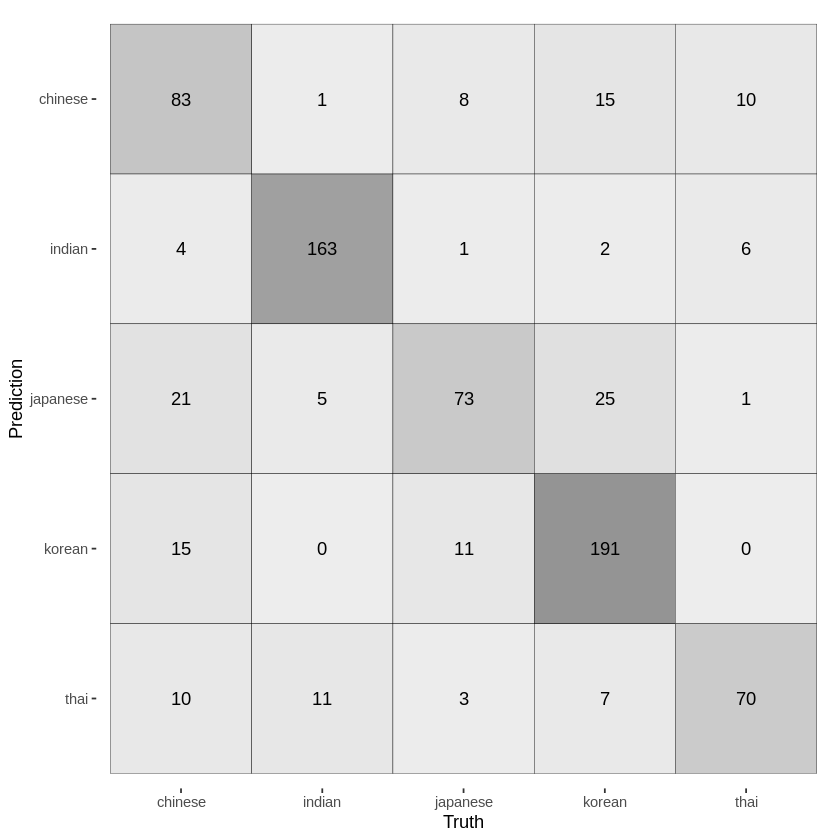

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

కన్ఫ్యూజన్ మ్యాట్రిక్స్ ప్లాట్‌లో గాఢమైన చతురస్రాలు ఎక్కువ కేసుల సంఖ్యను సూచిస్తాయి, మరియు మీరు ఆశిస్తున్నట్లుగా, అంచనా వేయబడిన మరియు వాస్తవ లేబుల్ ఒకటే ఉన్న కేసులను సూచించే గాఢమైన చతురస్రాల диагోనల్ రేఖను చూడవచ్చు.

ఇప్పుడు కన్ఫ్యూజన్ మ్యాట్రిక్స్ కోసం సారాంశ గణాంకాలను లెక్కించుకుందాం.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


మనం ఖచ్చితత్వం, సున్నితత్వం, ppv వంటి కొన్ని ప్రమాణాలపై దృష్టి సారిస్తే, ప్రారంభానికి మనం బాగా తప్పలేదు 🥳!

## 4. లోతుగా పరిశీలించడం

ఒక సున్నితమైన ప్రశ్న అడుద్దాం: ఒక నిర్దిష్ట రకమైన వంటకాన్ని అంచనా ఫలితంగా ఎంచుకోవడానికి ఏ ప్రమాణం ఉపయోగించబడుతుంది?

బాగుంది, లాజిస్టిక్ రిగ్రెషన్ వంటి గణాంక యంత్ర అభ్యాస అల్గోరిథమ్లు `సంభావ్యత` ఆధారంగా ఉంటాయి; కాబట్టి వాస్తవానికి ఒక వర్గీకర్త ద్వారా అంచనా వేయబడేది అనేక సాధ్యమైన ఫలితాలపై ఒక సంభావ్యత పంపిణీ. అత్యధిక సంభావ్యత కలిగిన వర్గం ఆ గమనికలకు అత్యంత సాధ్యమైన ఫలితంగా ఎంచుకోబడుతుంది.

కఠిన వర్గ అంచనాలు మరియు సంభావ్యతలను రెండింటినీ చేయడం ద్వారా దీన్ని చర్యలో చూద్దాం.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


మంచిది!

✅ మోడల్ మొదటి పరిశీలన థాయ్ అని pretty sure గా ఎందుకు అనుకుంటుందో మీరు వివరించగలరా?

## **🚀సవాలు**

ఈ పాఠంలో, మీరు శుభ్రపరిచిన డేటాను ఉపయోగించి ఒక మెషీన్ లెర్నింగ్ మోడల్‌ను నిర్మించారు, ఇది ఒక శ్రేణి పదార్థాల ఆధారంగా జాతీయ వంటకాన్ని అంచనా వేయగలదు. డేటాను వర్గీకరించడానికి Tidymodels అందించే [చాలా ఎంపికలను](https://www.tidymodels.org/find/parsnip/#models) మరియు మల్టినోమియల్ రిగ్రెషన్‌ను సరిపెట్టడానికి [ఇతర మార్గాలను](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) చదవడానికి కొంత సమయం తీసుకోండి.

#### ధన్యవాదాలు:

[`Allison Horst`](https://twitter.com/allison_horst/) కు, R ను మరింత ఆహ్లాదకరంగా మరియు ఆకర్షణీయంగా చేసే అద్భుతమైన చిత్రణలను సృష్టించినందుకు. ఆమె [గ్యాలరీ](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) లో మరిన్ని చిత్రణలను చూడండి.

[Cassie Breviu](https://www.twitter.com/cassieview) మరియు [Jen Looper](https://www.twitter.com/jenlooper) కు, ఈ మాడ్యూల్ యొక్క అసలు Python వెర్షన్ సృష్టించినందుకు ♥️

<br>
కొన్ని జోకులు చెప్పాలనుకున్నా, నేను ఫుడ్ పన్స్ అర్థం చేసుకోలేను 😅.

<br>

సంతోషంగా నేర్చుకోండి,

[Eric](https://twitter.com/ericntay), గోల్డ్ మైక్రోసాఫ్ట్ లెర్న్ స్టూడెంట్ అంబాసిడర్.


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**అస్పష్టత**:  
ఈ పత్రాన్ని AI అనువాద సేవ [Co-op Translator](https://github.com/Azure/co-op-translator) ఉపయోగించి అనువదించబడింది. మేము ఖచ్చితత్వానికి ప్రయత్నించినప్పటికీ, ఆటోమేటెడ్ అనువాదాల్లో పొరపాట్లు లేదా తప్పిదాలు ఉండవచ్చు. అసలు పత్రం దాని స్వదేశీ భాషలోనే అధికారిక మూలంగా పరిగణించాలి. ముఖ్యమైన సమాచారానికి, ప్రొఫెషనల్ మానవ అనువాదం సిఫార్సు చేయబడుతుంది. ఈ అనువాదం వాడకంలో ఏర్పడిన ఏవైనా అపార్థాలు లేదా తప్పుదారులు కోసం మేము బాధ్యత వహించము.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
